In [1]:
import keras.backend as K
from keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Activation, GlobalAveragePooling2D, concatenate,LSTM
from keras.layers import Embedding,TimeDistributed
from keras.models import Model
from keras.models import Sequential
from keras.optimizers import SGD, Adam

def my_neural_network_weichen(input_width, input_height, input_channel,nb_class=10, weights=None):    
    model = Sequential()
    model.add(Conv2D(32, (3,3), input_shape=(55,110,3)))    
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(LSTM(48000))
    
    model.add(Dense(2048))
    model.add(Flatten())
    model.add(Dense(32))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss='mse', optimizer= 'adam')
    return model

C:\Users\User\Anaconda3\envs\myNewEnvrm\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:
import argparse
import os
import numpy as np
import tensorflow as tf
import keras
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from PIL import Image

from text_image_generator.text_image import load_data
(x_train, y_train), (x_test, y_test) = load_data()

print(x_train.shape)
print(x_test.shape)

input_shape = x_train[0].shape

number_of_class = 10
model = my_neural_network_weichen(55, 110, 3,number_of_class) 
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(x_train.reshape(x_train.shape[0],55,110,3), y_train,validation_split=0.2,epochs=10, batch_size=128)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss: {} , Test accuracy: {}".format(score[0], score[1]))

y_predict = model.predict(x_test)

(48000, 55, 110, 3)
(12000, 55, 110, 3)


ValueError: Input 0 is incompatible with layer lstm_2: expected ndim=3, found ndim=4

In [3]:
from text_image_generator.text_image import load_data
(x_train, y_train), (x_test, y_test) = load_data()

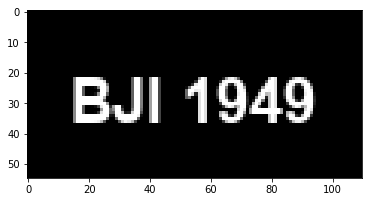

In [4]:
plt.imshow(x_train[0])

In [5]:
print(y_train[0])

BJI1949
